In [2]:
# File name: Exercise 4.7 - Visualizations for Orders/Products/Customers dataframe
# Author: Sam Abrams
# Created: 11/9/24
# Description: This notebook contains an assortment of exploratory visualizations for the newly created orders/products/customers dataframe, mainly in order to get a feel for the shape and contents of the new dataframe.

# Task 4.9 - Visualizations for new Orders/Products/Customers dataframe

In [4]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# import dataframe
df_ord_prod_cust = pd.read_pickle('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/02 Data/Prepared Data/ALL_order_prod_cust_dataframe.pkl')

## Histogram of Busiest Times of the Day

In [7]:
df_ord_prod_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,freq_flag,first_name,last_name,Gender,state,Age,date_joined,num_dependents,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [33]:
df_ord_prod_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   product_id             int64   
 1   product_name           object  
 2   aisle_id               int64   
 3   department_id          int64   
 4   prices                 float64 
 5   order_id               int64   
 6   user_id                int64   
 7   order_number           int64   
 8   order_day_of_week      int64   
 9   order_hour_of_day      int64   
 10  days_since_last_order  float64 
 11  add_to_cart_order      int64   
 12  reordered              int64   
 13  _merge                 category
 14  source                 category
 15  price_range            object  
 16  price_range_loc        object  
 17  busiest days           object  
 18  busiest day            object  
 19  busiest_period_of_day  object  
 20  max_order              int64   
 21  loyalty_flag           object

Text(0, 0.5, 'Number of Orders (millions)')

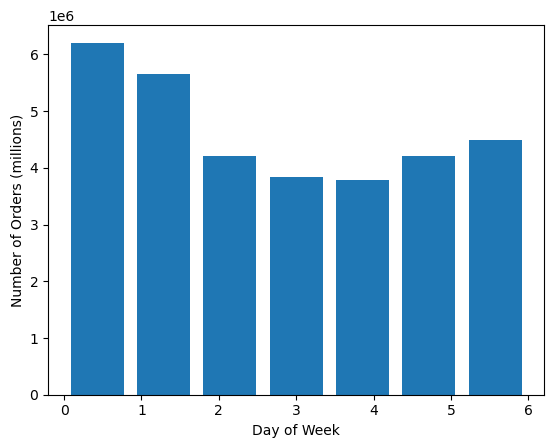

In [25]:
# Creat the histogram
df_ord_prod_cust['order_day_of_week'].plot.hist(bins = 7, rwidth=0.8)
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders (millions)')

In [31]:
# Frequency table to supplement histogram
df_ord_prod_cust['order_day_of_week'].value_counts(dropna=False)

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

The histogram above shows the number of orders for each day of the week. The y-axis represents orders in millions, and the x-axis represents the day of the week. The data has been entered such that 0 represents Saturday, 1 represents Sunday, so on and so forth until 6 represents Friday. Although the numbers don't match up exactly to the bars they represent, The days are listed in order from Saturday (left-most bar, day 0) to Friday (right-most bar, day 6). Value counts have been added below to help increase readability.

In short, what this graph shows is that Saturday and Sunday are the days where customers are more likely to order Instacart, with Friday a distant third place.

Another note not to the stakeholders - it feels like a histogram wouldn't be the best way to graph this, wouldn't a bar/column chart be more effective?

Text(0, 0.5, 'Number of Orders (millions)')

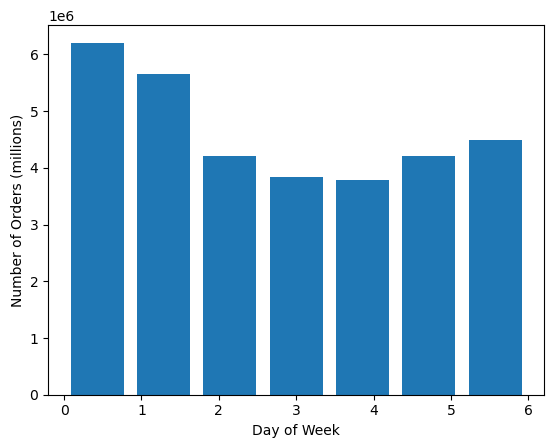

In [74]:
# Saving histogram and exporting to folder
hist = df_ord_prod_cust['order_day_of_week'].plot.hist(bins = 7, rwidth=0.8)
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders (millions)')

In [78]:
# Exporting histogram
hist.figure.savefig('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis/Visualizations/histogram_order_dow.png')

## Bar Chart of Loyal Customers

Text(0, 0.5, 'Number of Customers')

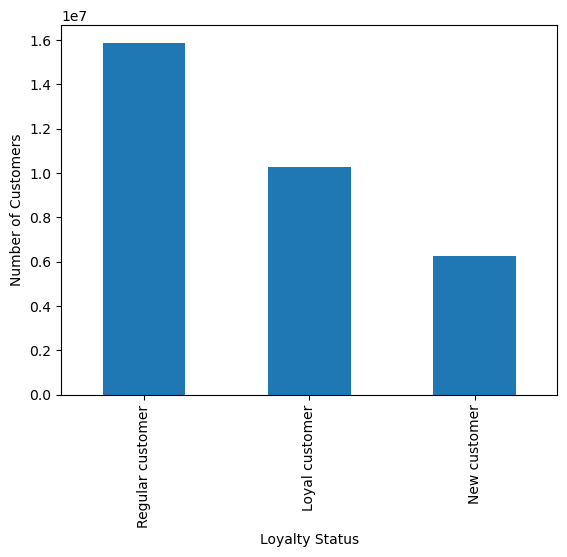

In [41]:
df_ord_prod_cust['loyalty_flag'].value_counts().plot.bar()
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

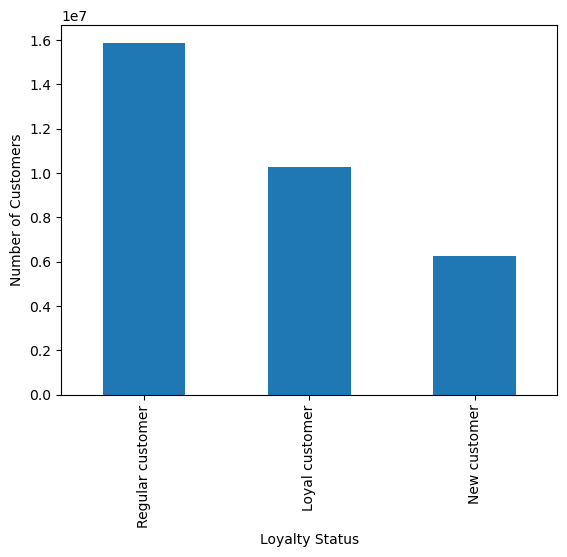

In [80]:
# Saving chart and exporting to folder
loyalty_bar = df_ord_prod_cust['loyalty_flag'].value_counts().plot.bar()
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')

In [82]:
loyalty_bar.figure.savefig('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_bar.png')

## Plotting Prices vs. Hour of Day

In [12]:
# Create "dev" list with randomly assigned boolean values for each entry - 70% true, 30% false
np.random.seed(4)
dev = np.random.rand(len(df_ord_prod_cust)) <= 0.7

In [14]:
big_sample = df_ord_prod_cust[dev]
small_sample = df_ord_prod_cust[~dev]

In [15]:
df_ord_prod_cust.shape

(32404859, 35)

In [18]:
print(len(big_sample) + len(small_sample))

32404859


In [20]:
# Assign small subset to new dataframe df_small
df_small = small_sample[['order_hour_of_day','prices']]

In [22]:
df_small.head()

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


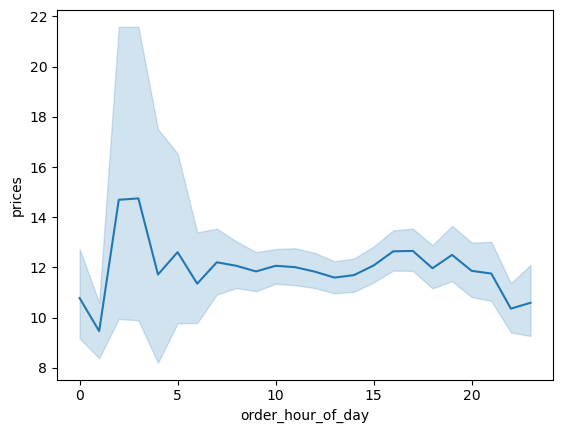

In [70]:
# Create scatter plot to compare order hour and prices
scatter = sns.lineplot(data = df_small, x = 'order_hour_of_day', y = 'prices')

In [93]:
# exporting graph to folder
scatter.figure.savefig('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis/Visualizations/line_price_vs_order_hour.png')

I realize now that I mistakenly called this a scatter plot, despite creating a line chart.

## Line Chart Comparing Age and Dependents

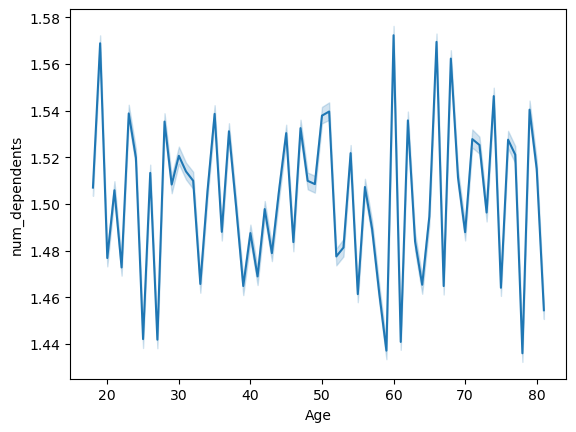

In [89]:
scatter_age_dep = sns.lineplot(data = small_sample, x = 'Age', y = 'num_dependents')

It would appear that there is NOT a connection between the age of the user and the number of dependents they have.

In [96]:
# Exporting to folder
scatter_age_dep.figure.savefig('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis/Visualizations/line_age_vs_dependents.png')

## Scatter Plot Comparing Age and Income

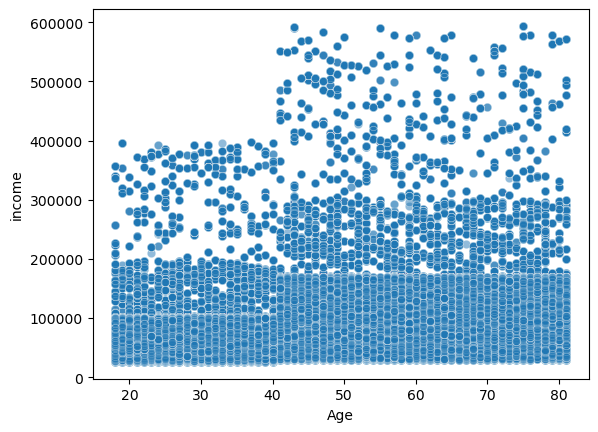

In [34]:
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income', data = small_sample, alpha=0.2)

In [28]:
small_sample.shape

(9721098, 35)

I tried a couple different ways to make this graph more readable, but landed on using the alpha parameter to make the points more transparent in a hope to make the concentrations of points more visible. However, that functionally did nothing to improve readability. I could maybe sample further, or bin the points somehow, although the methods for doing that with a scatter plot seems complicated considering my current comfort level with Python.

At any rate, I think there is definitely a trend there. You start seeing higher income levels in the early 40s, although I am curious why it's segmented the way it is.

In [41]:
small_sample['income'].describe()

count    9.721098e+06
mean     9.943873e+04
std      4.303414e+04
min      2.590300e+04
25%      6.700900e+04
50%      9.663100e+04
75%      1.279140e+05
max      5.939010e+05
Name: income, dtype: float64

In [43]:
value_counts = small_sample['income'].value_counts(sort=False)
with pd.option_context('display.max_rows', None):
    print(value_counts)

income
49620       58
158302      59
31308       90
34171       56
42573      113
32283      132
53340      324
56559       64
96906      229
85558       33
151610      51
44926       50
78445       35
32988       38
46444       96
47667      142
151450      51
146224      29
39805       41
40667       21
44717       22
34571       63
157691      22
27777       17
53309      148
55105       13
45176      116
39625       98
55100      345
42406       77
35231      149
47337       52
33435       35
40415      238
165382      23
95734       98
106485      81
38778        9
100773     249
98543       46
104884     268
41999       48
55044      422
29885      158
96805      212
30154      203
100174     406
34375       80
135803      14
44027      162
152035      43
37757        8
43056       35
42585       32
31340      110
54186       53
45427       70
112619     132
35970       60
107846     121
48373      153
47143      230
125582      28
63615      210
27890       87
149199     133
147

In [51]:
# Creating a subset sample that only has Age and Income
df_small_age_income = small_sample[['Age', 'income']]

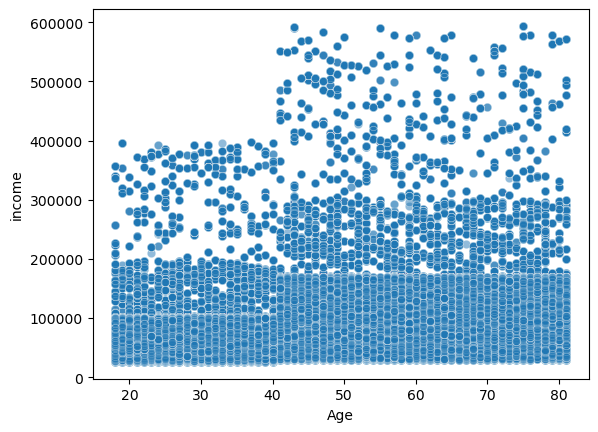

In [56]:
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_small_age_income, alpha=0.2)

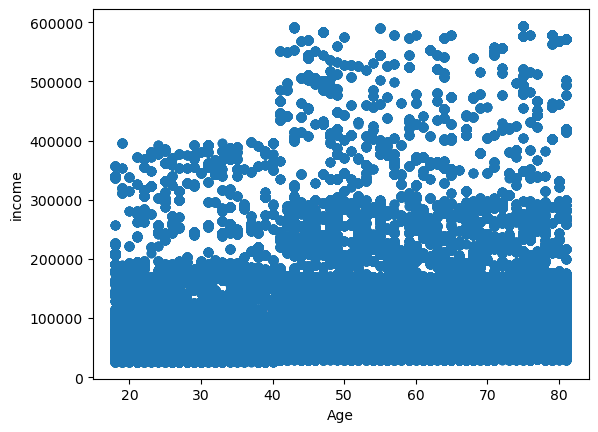

In [60]:
# New scatterplot with simplified sample
scatter_age_income_reg = sns.regplot(x = 'Age', y = 'income', data = df_small_age_income)
plt.show()

I had to do some research to figure out how to add a best fit line to a scatterplot. I used regplot() instead of scatterplot() so it would add a regression line. The trend is understandable but hard to read in the first scatterplot, but a best fit line would help illustrate that trend a little more clearly. I couldn't figure out how to get the line to show up though, so... that's a bummer. Still though, there is a visible trend, although it could obviously be more clearly illustrated.

In [61]:
# Exporting to folder
scatter_age_income.figure.savefig('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis/Visualizations/scatter_age_income.png')

In [62]:
# Exporting to folder
scatter_age_income_reg.figure.savefig('/Users/samabrams/Data Analysis Projects/Instacart Basket Analysis/04 Analysis/Visualizations/scatter_age_income_linear_reg.png')